In [1]:
# Bismilah 
# Fréquence trimestrielle
# Serie positive
# Pas de dates fournies => on creer un index temporelle artificiel

# on ne méllange jamais la serie 



In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


data = pd.read_csv("Quarterly-train.csv")

Le dataset M4 est fourni en format wide : chaque colonne correspond à une série temporelle distincte. L’analyse est réalisée sur une seule série (V1), conformément aux recommandations du cours.

Une ligne = un instant t

Une colonne = l’évolution dans le temps


Une série temporelle est une suite de valeurs d’une même variable observée à différents instants.

## 1-Preparation de données 

In [3]:
serie = data["V2"].dropna().iloc[:100]

In [4]:
serie.head()

0    7407.412314
1    7552.454619
2    8463.842193
3    8498.941194
4    1835.000000
Name: V2, dtype: float64

In [5]:
serie.info()

<class 'pandas.core.series.Series'>
Index: 100 entries, 0 to 99
Series name: V2
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [6]:
serie.dtype

dtype('float64')

## 2 Creation de l'index trimestriel

In [7]:
serie.index = pd.period_range(
    start = "2000Q1",
    periods = len(serie),
    freq = "Q"
)

In [8]:
# Créer l’index temporel (trimestriel) car pour l'instant la serie à un index numerique 

serie.head()

2000Q1    7407.412314
2000Q2    7552.454619
2000Q3    8463.842193
2000Q4    8498.941194
2001Q1    1835.000000
Freq: Q-DEC, Name: V2, dtype: float64

In [9]:
serie.index

PeriodIndex(['2000Q1', '2000Q2', '2000Q3', '2000Q4', '2001Q1', '2001Q2',
             '2001Q3', '2001Q4', '2002Q1', '2002Q2', '2002Q3', '2002Q4',
             '2003Q1', '2003Q2', '2003Q3', '2003Q4', '2004Q1', '2004Q2',
             '2004Q3', '2004Q4', '2005Q1', '2005Q2', '2005Q3', '2005Q4',
             '2006Q1', '2006Q2', '2006Q3', '2006Q4', '2007Q1', '2007Q2',
             '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3', '2008Q4',
             '2009Q1', '2009Q2', '2009Q3', '2009Q4', '2010Q1', '2010Q2',
             '2010Q3', '2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4',
             '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1', '2013Q2',
             '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3', '2014Q4',
             '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1', '2016Q2',
             '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4',
             '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
             '2019Q3', '2019Q4', '2020Q1', '2020Q2'

In [10]:
serie.shape

(100,)

In [11]:
serie.head(10)

2000Q1    7407.412314
2000Q2    7552.454619
2000Q3    8463.842193
2000Q4    8498.941194
2001Q1    1835.000000
2001Q2    8873.000000
2001Q3    3431.000000
2001Q4    2599.100000
2002Q1    2856.200000
2002Q2    2329.000000
Freq: Q-DEC, Name: V2, dtype: float64

## 3-visualisation de la serie 

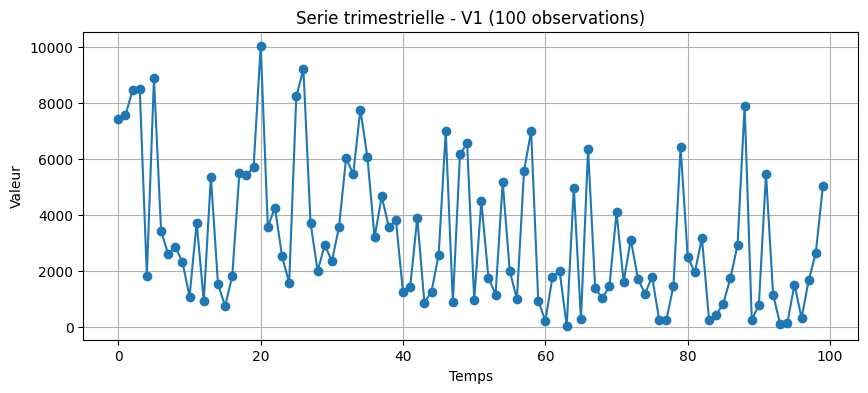

In [12]:
# visualisation de la serie 

plt.figure(figsize=(10,4))
plt.plot(serie.values, marker='o')
plt.title("Serie trimestrielle - V1 (100 observations)")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.grid(True)
plt.show()

La série ne présente pas de tendance ni de saisonnalité trimestrielle clairement identifiables, mais une forte variabilité et des fluctuations irrégulières.

In [13]:
serie.head()

2000Q1    7407.412314
2000Q2    7552.454619
2000Q3    8463.842193
2000Q4    8498.941194
2001Q1    1835.000000
Freq: Q-DEC, Name: V2, dtype: float64

In [14]:
serie.dtype

dtype('float64')

## 4-Test de stationnarité (ADF)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Est-ce que la série est stationnaire ou non ?

result = adfuller(serie)

# H₀ : la série n’est pas stationnaire

# H₁ : la série est stationnaire

In [ ]:
print("ADF Statistic :", result[0])
print("p-value       :", result[1])

for key, value in result[4].items():
    print(f"Critical value {key} : {value}")

    # La serie est stationnaire (on rejette H0)

ADF Statistic : -7.703358638641108
p-value       : 1.3212412111397832e-11
Critical value 1% : -3.498198082189098
Critical value 5% : -2.891208211860468
Critical value 10% : -2.5825959973472097


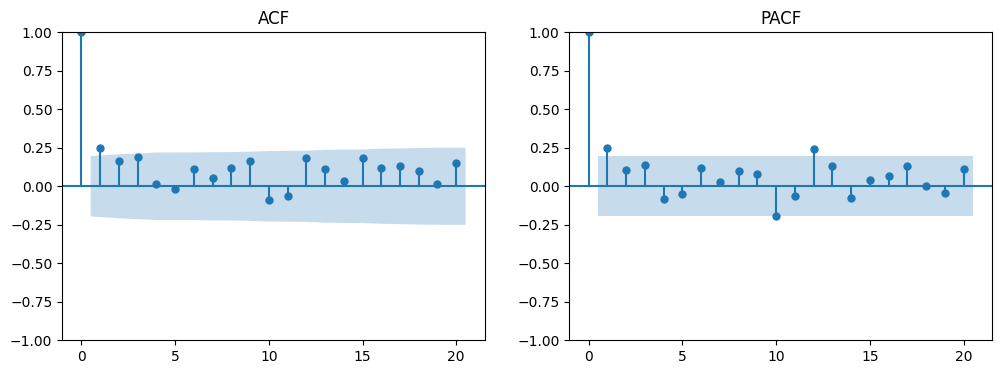

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12,4))

plot_acf(serie, lags=20, ax=axes[0])
axes[0].set_title("ACF")

plot_pacf(serie, lags=20, ax=axes[1], method="ywm")
axes[1].set_title("PACF")

plt.show()


Lecture de l’ACF (à gauche)

les autocorrélations restent faibles

la majorité des barres est dans l’intervalle de confiance

Lecture de la PACF (à droite)

Pas de structure AR claire
Pas de modèle AR(p) dominant

Les fonctions d’autocorrélation et d’autocorrélation partielle ne révèlent pas de structure AR ou MA marquée, suggérant que la série peut être assimilée à un bruit blanc stationnaire ou modélisée par un ARIMA de faible ordr

AR = AutoRegressive  Yt​=c+ϕ1​Yt−1​+ϕ2​Yt−2​+⋯+ϕp​Yt−p​+εt​
MA = Moving Average  Yt​=μ+εt​+θ1​εt−1​+⋯+θq​εt−q​


Un modèle AR capture la dépendance entre les observations passées, tandis qu’un modèle MA modélise l’impact des chocs aléatoires passés sur la série.

In [19]:
from statsmodels.tsa.arima.model import ARIMA

model_000 = ARIMA(serie, order=(0,0,0))
result_000 = model_000.fit()

print(result_000.summary())

                               SARIMAX Results                                
Dep. Variable:                     V2   No. Observations:                  100
Model:                          ARIMA   Log Likelihood                -925.388
Date:                Thu, 12 Feb 2026   AIC                           1854.777
Time:                        13:36:04   BIC                           1859.987
Sample:                    03-31-2000   HQIC                          1856.886
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3243.9678    323.297     10.034      0.000    2610.318    3877.617
sigma2      6.389e+06   1.29e+06      4.945      0.000    3.86e+06    8.92e+06
Ljung-Box (L1) (Q):                   6.50   Jarque-

In [ ]:
# ARIMA(1,0,0) (petit effet AR)
model_100 = ARIMA(serie, order=(1,0,0))
result_100 = model_100.fit()

print(result_100.summary())


                               SARIMAX Results                                
Dep. Variable:                     V2   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -922.062
Date:                Thu, 12 Feb 2026   AIC                           1850.125
Time:                        13:36:24   BIC                           1857.940
Sample:                    03-31-2000   HQIC                          1853.288
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3244.0353    398.563      8.139      0.000    2462.867    4025.204
ar.L1          0.2569      0.091      2.821      0.005       0.078       0.435
sigma2      5.868e+06   1.17e+06      5.024      0.0

In [21]:
# ARIMA(0,0,1) (petit effet MA)
model_001 = ARIMA(serie, order=(0,0,1))
result_001 = model_001.fit()

print(result_001.summary())


                               SARIMAX Results                                
Dep. Variable:                     V2   No. Observations:                  100
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -922.646
Date:                Thu, 12 Feb 2026   AIC                           1851.291
Time:                        13:37:03   BIC                           1859.107
Sample:                    03-31-2000   HQIC                          1854.454
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3247.8684    373.745      8.690      0.000    2515.342    3980.395
ma.L1          0.2195      0.092      2.396      0.017       0.040       0.399
sigma2      6.044e+06   1.23e+06      4.924      0.0

Le modèle ARIMA(0,0,1) présente un bon ajustement, avec un paramètre MA significatif et des résidus assimilables à un bruit blanc selon le test de Ljung-Box. Il constitue un modèle adéquat pour cette série.

In [22]:
# Comparaison des  models 

print("ARIMA(0,0,0) AIC :", result_000.aic)
print("ARIMA(1,0,0) AIC :", result_100.aic)
print("ARIMA(0,0,1) AIC :", result_001.aic)


ARIMA(0,0,0) AIC : 1854.7769250744427
ARIMA(1,0,0) AIC : 1850.1245082623182
ARIMA(0,0,1) AIC : 1851.291226670459


Plusieurs modèles ARIMA de faible ordre ont été estimés. Le modèle retenu est celui minimisant le critère AIC, indiquant un compromis optimal entre qualité d’ajustement et complexité.

TypeError: float() argument must be a string or a real number, not 'Period'

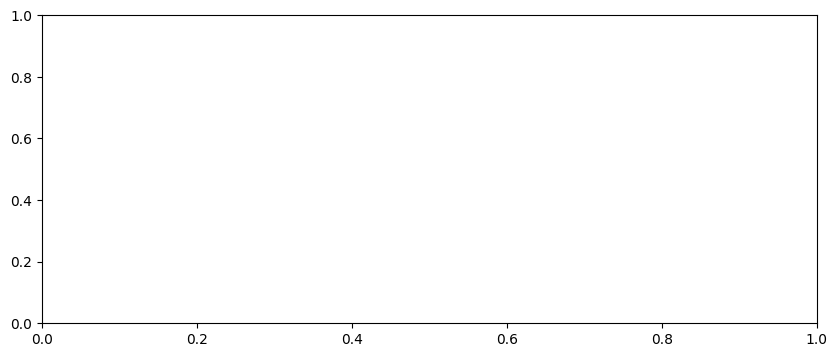

In [23]:
residuals = result_000.resid

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Résidus du modèle")
plt.grid(True)
plt.show()

plot_acf(residuals, lags=20)
plt.show()
